In [1]:
%load_ext autoreload
%autoreload 2

In [73]:
from dataloader import read_csv, convert_to_lowercase
from preprocessing import preprocess_data_for_visualization
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('Set2')

In [82]:
trainX, trainY = read_csv('data/train.csv', ylabel='price')

In [83]:
# % of the number of data samples which have NA to the total number of data samples in training set
all_data_na = (trainX.isnull().sum() / len(trainX)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing %': all_data_na})

for each_na_feature in np.transpose(missing_data).columns:
    print('{}, dtype = {}'.format(each_na_feature, trainX[str(each_na_feature)].dtype))

missing_data.head(15)

floor_level, dtype = object
total_num_units, dtype = float64
tenure, dtype = object
available_unit_types, dtype = object
built_year, dtype = float64
num_baths, dtype = float64
subzone, dtype = object
planning_area, dtype = object
num_beds, dtype = float64


,Missing %
floor_level,82.679964
total_num_units,27.905599
tenure,8.506962
available_unit_types,7.114644
built_year,4.552187
num_baths,2.142787
subzone,0.557914
planning_area,0.557914
num_beds,0.394984


Text(0.5, 1.0, '% missing data by feature')

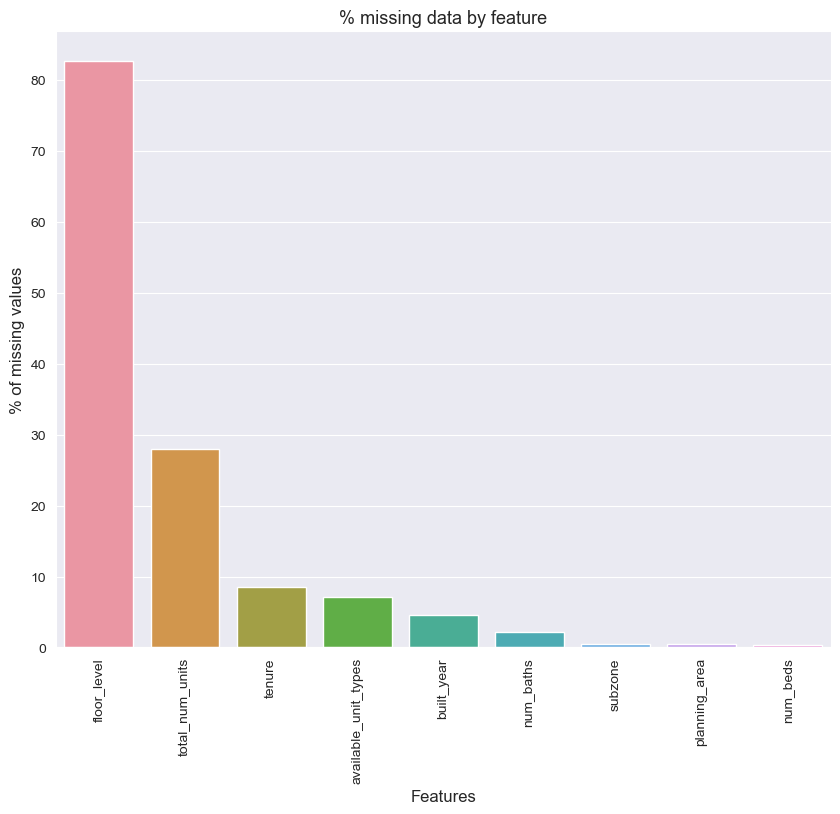

In [84]:
plt.figure(figsize=(10, 8))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=12)
plt.ylabel('% of missing values', fontsize=12)
plt.title('% missing data by feature', fontsize=13)

In [85]:
preprocess_data_for_visualization(trainX, trainY)

In [86]:
trainX.head()

,listing_id,title,address,property_name,property_type,tenure,built_year,num_beds,num_baths,size_sqft,floor_level,furnishing,available_unit_types,total_num_units,property_details_url,lat,lng,elevation,subzone,planning_area
0,122881,hdb flat for sale in 866 yishun street 81,sembawang / yishun (d27),866 yishun street 81,hdb 4 rooms,NaN,1988.0,3.0,2.0,1115,NaN,unspecified,NaN,116.0,https://www.99.co/singapore/hdb/866-yishun-str...,1.414399,103.837196,0,yishun south,yishun
1,259374,hdb flat for sale in 506b serangoon north aven...,hougang / punggol / sengkang (d19),hdb-serangoon estate,hdb,99-year leasehold,1992.0,4.0,2.0,1575,NaN,unspecified,"1, 2, 3, 4, 5, 6 br",NaN,https://www.99.co/singapore/hdb/hdbserangoon-e...,1.372597,103.875625,0,serangoon north,serangoon
2,665422,4 bed condo for sale in meyerhouse,128 meyer road,meyerhouse,condo,freehold,2022.0,4.0,6.0,3070,low,partial,"studio, 3, 4, 5, 6 br",56.0,https://www.99.co/singapore/condos-apartments/...,1.298773,103.895798,0,mountbatten,marine parade
3,857699,3 bed condo for sale in leedon green,26 leedon heights,leedon green,Condo,freehold,2023.0,3.0,2.0,958,NaN,partial,"studio, 1, 2, 3, 4 br",638.0,https://www.99.co/singapore/condos-apartments/...,1.312364,103.803271,0,farrer court,bukit timah
4,216061,2 bed condo for sale in one bernam,1 bernam street,one bernam,condo,99-year leasehold,2026.0,2.0,1.0,732,NaN,unspecified,"studio, 1, 2, 3, 4, 5 br",351.0,https://www.99.co/singapore/condos-apartments/...,1.273959,103.843635,0,anson,downtown core


In [87]:
df_trainY = pd.DataFrame(data=trainY, columns=['price'])
column_names = list(trainX.columns.values)
column_names.append('price')
train_X_Y = pd.concat([trainX, df_trainY],axis=1, ignore_index=True, sort=False)
train_X_Y.columns = column_names

In [81]:
train_X_Y.head()

,listing_id,title,address,property_name,property_type,tenure,built_year,num_beds,num_baths,size_sqft,...,furnishing,available_unit_types,total_num_units,property_details_url,lat,lng,elevation,subzone,planning_area,price
0,122881,hdb flat for sale in 866 yishun street 81,sembawang / yishun (d27),866 yishun street 81,hdb 4 rooms,NaN,1988.0,3.0,2.0,1115,...,unspecified,NaN,116.0,https://www.99.co/singapore/hdb/866-yishun-str...,1.414399,103.837196,0,yishun south,yishun,514500.0
1,259374,hdb flat for sale in 506b serangoon north aven...,hougang / punggol / sengkang (d19),hdb-serangoon estate,hdb,99-year leasehold,1992.0,4.0,2.0,1575,...,unspecified,"1, 2, 3, 4, 5, 6 br",NaN,https://www.99.co/singapore/hdb/hdbserangoon-e...,1.372597,103.875625,0,serangoon north,serangoon,995400.0
2,665422,4 bed condo for sale in meyerhouse,128 meyer road,meyerhouse,condo,freehold,2022.0,4.0,6.0,3070,...,partial,"studio, 3, 4, 5, 6 br",56.0,https://www.99.co/singapore/condos-apartments/...,1.298773,103.895798,0,mountbatten,marine parade,8485000.0
3,857699,3 bed condo for sale in leedon green,26 leedon heights,leedon green,Condo,freehold,2023.0,3.0,2.0,958,...,partial,"studio, 1, 2, 3, 4 br",638.0,https://www.99.co/singapore/condos-apartments/...,1.312364,103.803271,0,farrer court,bukit timah,2626000.0
4,216061,2 bed condo for sale in one bernam,1 bernam street,one bernam,condo,99-year leasehold,2026.0,2.0,1.0,732,...,unspecified,"studio, 1, 2, 3, 4, 5 br",351.0,https://www.99.co/singapore/condos-apartments/...,1.273959,103.843635,0,anson,downtown core,1764000.0


In [46]:
df_property_type_average_price = train_X_Y.groupby('property_type', as_index=False)['price'].mean()
df_property_type_average_price.rename(columns={'price': 'average_price'}, inplace=True)
df_property_type_average_price.sort_values(by=['average_price'], ascending=False, inplace=True)

In [13]:
df_property_type_average_price.head(100)

,property_type,average_price
24,good class bungalow,3.783150e+07
1,Bungalow,1.775527e+07
18,bungalow,1.705577e+07
21,conservation house,8.986520e+06
14,Semi-Detached House,7.783632e+06
4,Conservation House,7.780150e+06
33,semi-detached house,7.691974e+06
13,Landed,7.048300e+06
22,corner terrace,6.332275e+06
5,Corner Terrace,5.770583e+06


[Text(0.5, 1.0, 'Average prices of different property_types'),
 Text(0.5, 0, 'average_price'),
 Text(0, 0.5, 'property_type')]

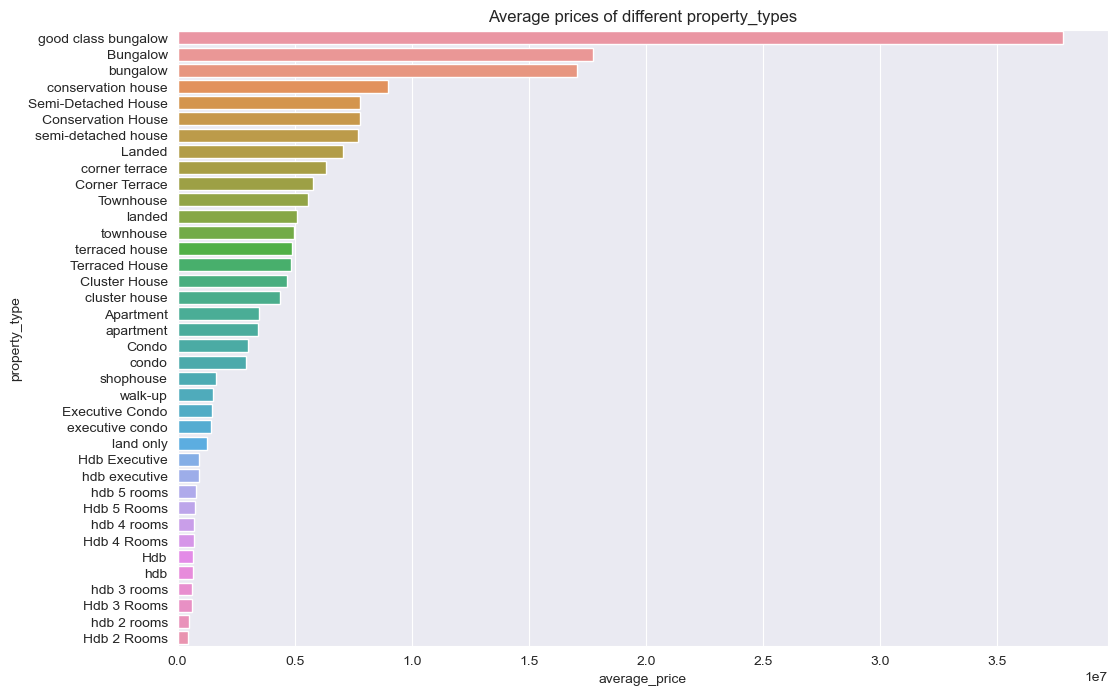

In [47]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=df_property_type_average_price, y='property_type', x='average_price', orient='h')
ax.set(title='Average prices of different property_types', xlabel='average_price', ylabel='property_type')
# container = ax.containers[0]
# ax.bar_label(container, labels=[f'{x:,.0f}' for x in container.datavalues])
# ax.bar_label(ax.containers[0])
# ax.tick_params(axis='x', rotation=90)

In [48]:
df_property_type_counts = train_X_Y.groupby('property_type', as_index=False)['price'].count()
df_property_type_counts.rename(columns={'price': 'count'}, inplace=True)
df_property_type_counts.sort_values(by=['count'], ascending=False, inplace=True)

In [49]:
df_property_type_counts.head(100)

,property_type,count
20,condo,7809
25,hdb,2285
3,Condo,1733
27,hdb 3 rooms,958
28,hdb 4 rooms,939
33,semi-detached house,850
23,executive condo,818
18,bungalow,620
29,hdb 5 rooms,561
7,Hdb,508


[Text(0.5, 1.0, 'Counts of different property_types'),
 Text(0.5, 0, 'count'),
 Text(0, 0.5, 'property_type')]

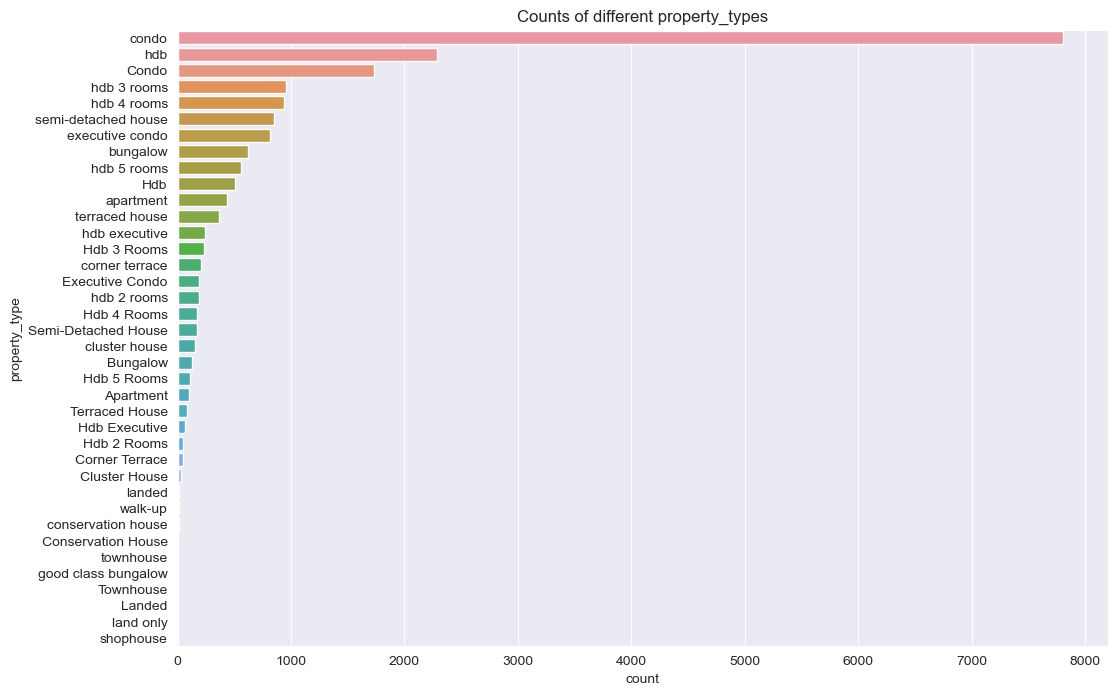

In [50]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=df_property_type_counts, y='property_type', x='count', orient='h')
ax.set(title='Counts of different property_types', xlabel='count', ylabel='property_type')
# ax.bar_label(ax.containers[0])

In [51]:
df_built_year_average_price = train_X_Y.groupby('built_year', as_index=False)['price'].mean()
df_built_year_average_price.rename(columns={'price': 'average_price'}, inplace=True)

In [52]:
df_built_year_average_price.head(100)

,built_year,average_price
0,1963.0,4.326788e+06
1,1967.0,4.519658e+05
2,1968.0,8.046500e+05
3,1969.0,3.885268e+05
4,1970.0,3.476493e+06
...,...,...
58,2024.0,2.876042e+06
59,2025.0,3.480338e+06
60,2026.0,2.623259e+06
61,2027.0,1.589830e+06


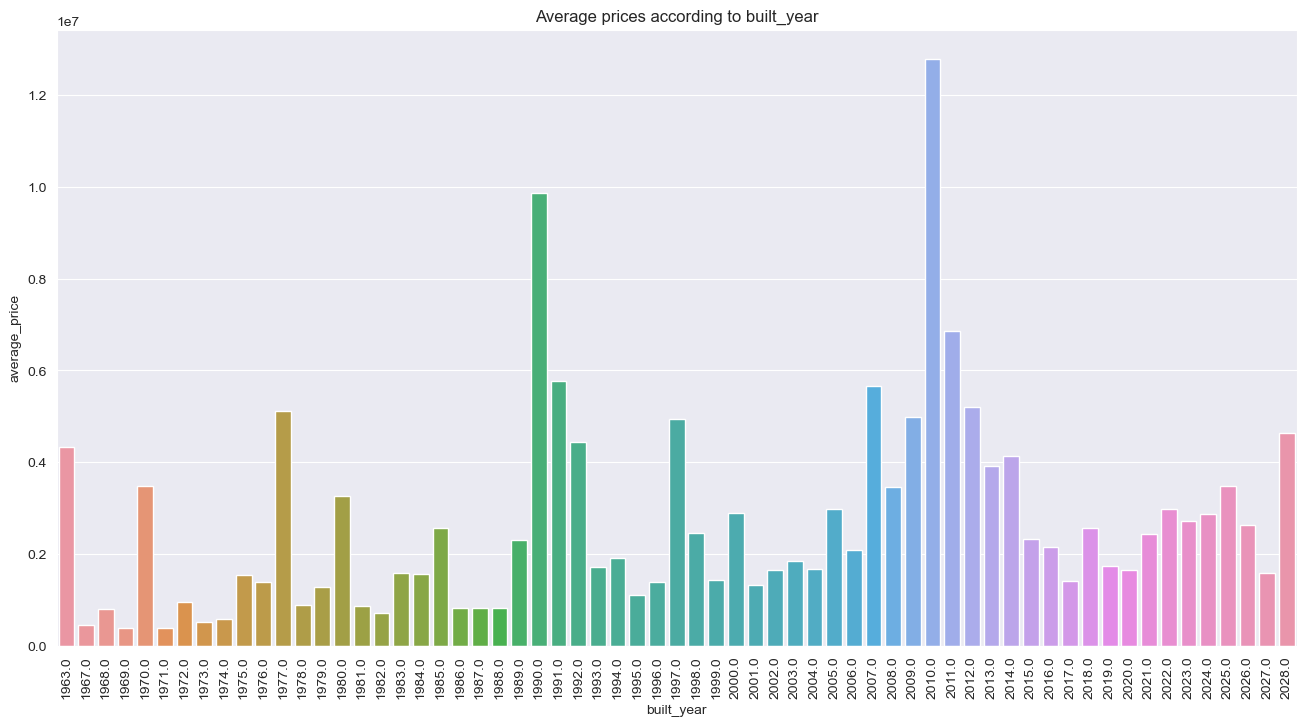

In [53]:
plt.figure(figsize=(16, 8))
ax = sns.barplot(data=df_built_year_average_price, x='built_year', y='average_price')
ax.set(title='Average prices according to built_year', xlabel='built_year', ylabel='average_price')
ax.tick_params(axis='x', rotation=90)

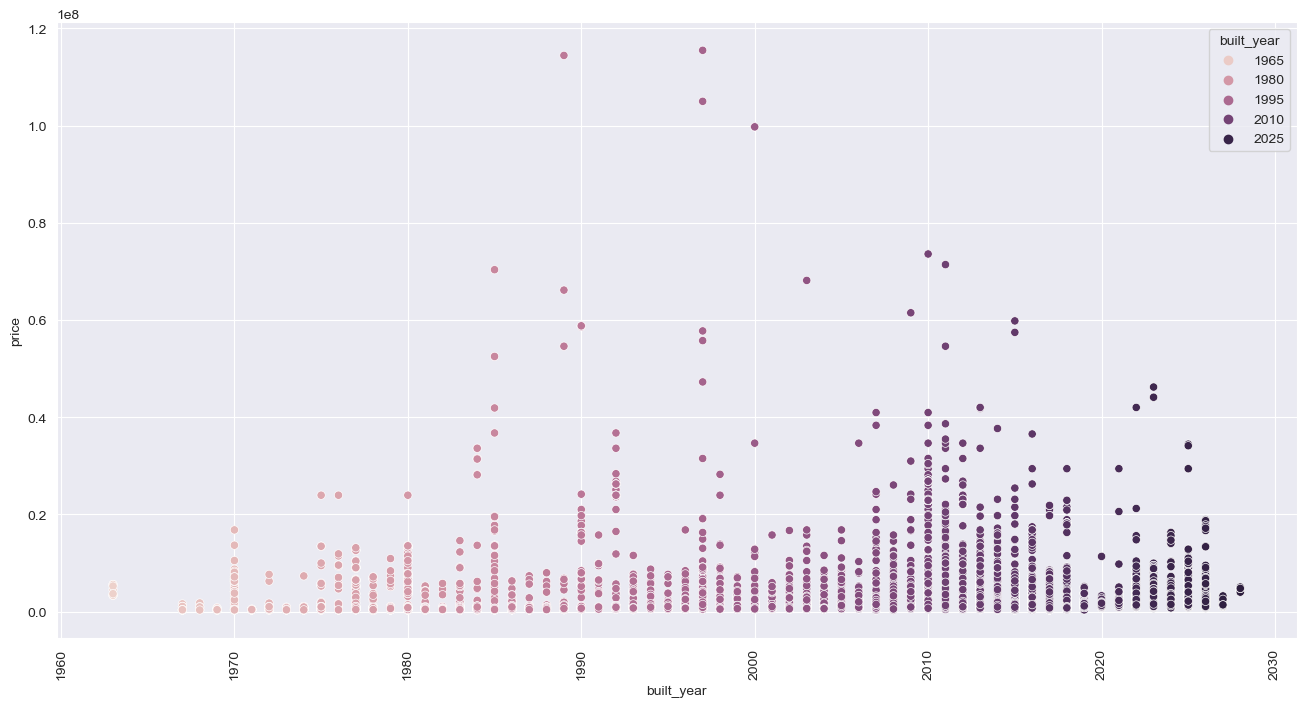

In [54]:
plt.figure(figsize=(16, 8))
ax = sns.scatterplot(data=train_X_Y, x='built_year', y='price', hue='built_year')
ax.tick_params(axis='x', rotation=90)

In [55]:
df_num_beds_average_price = train_X_Y.groupby('num_beds', as_index=False)['price'].mean()
df_num_beds_average_price.rename(columns={'price': 'average_price'}, inplace=True)

In [56]:
df_num_beds_average_price.head(100)

,num_beds,average_price
0,1.0,1.285755e+06
1,2.0,1.511315e+06
2,3.0,1.716479e+06
3,4.0,4.036771e+06
4,5.0,8.159848e+06
5,6.0,1.046793e+07
6,7.0,1.352549e+07
7,8.0,1.872304e+07
8,9.0,1.517184e+07
9,10.0,1.609049e+07


[Text(0.5, 1.0, 'Variation of Average price with num_beds'),
 Text(0.5, 0, 'num_beds'),
 Text(0, 0.5, 'average_price')]

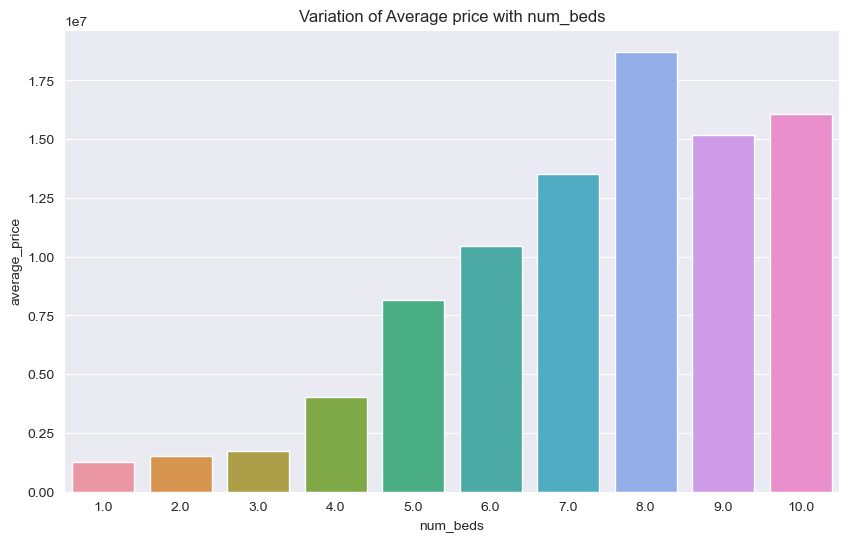

In [57]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_num_beds_average_price, x='num_beds', y='average_price')
ax.set(title='Variation of Average price with num_beds', xlabel='num_beds', ylabel='average_price')
# ax.tick_params(axis='x', rotation=90)

[Text(0.5, 1.0, 'Variation of price with num_beds'),
 Text(0.5, 0, 'num_beds'),
 Text(0, 0.5, 'price')]

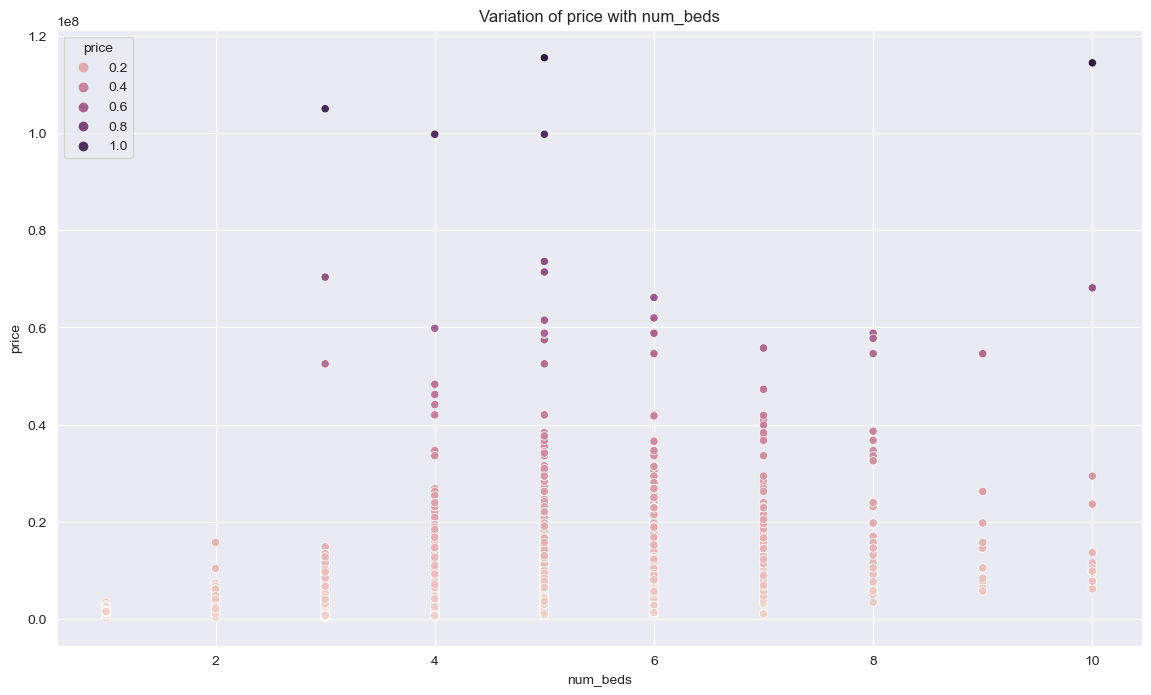

In [58]:
plt.figure(figsize=(14, 8))
ax = sns.scatterplot(data=train_X_Y, x='num_beds', y='price', hue='price')
ax.set(title='Variation of price with num_beds', xlabel='num_beds', ylabel='price')

[Text(0.5, 1.0, 'Variation of price with num_beds'),
 Text(0.5, 0, 'price'),
 Text(0, 0.5, 'num_beds')]

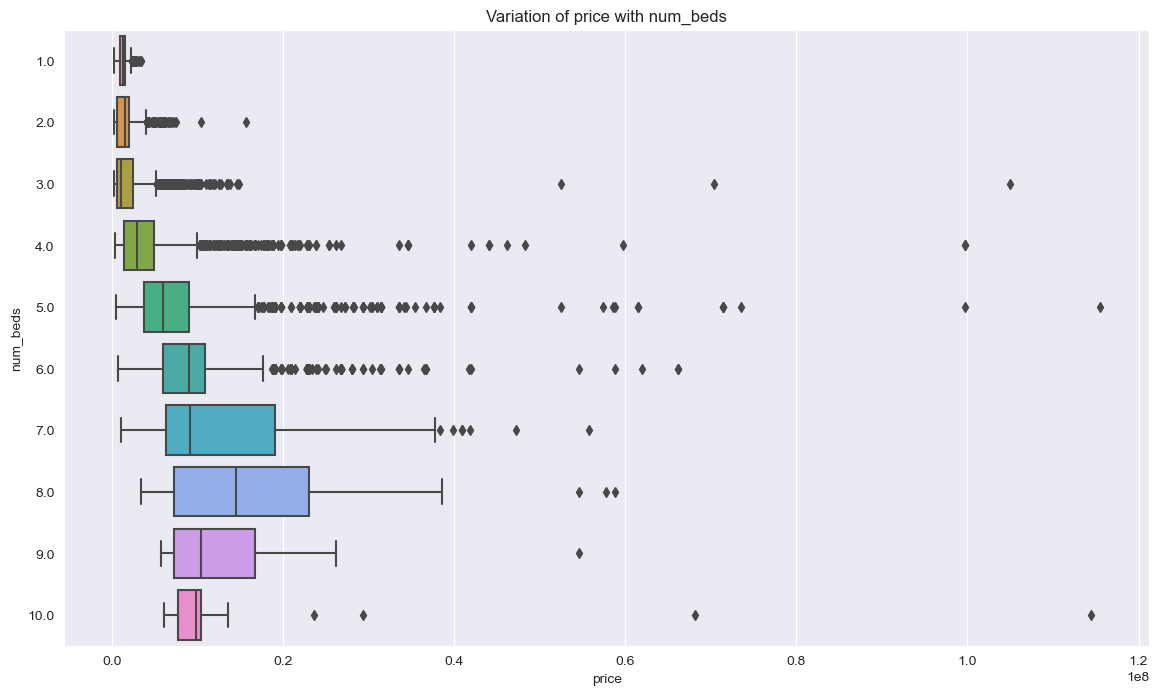

In [59]:
plt.figure(figsize=(14, 8))
ax = sns.boxplot(data=train_X_Y, x='price', y='num_beds', orient='h')
ax.set(title='Variation of price with num_beds', xlabel='price', ylabel='num_beds')

In [60]:
df_num_baths_average_price = train_X_Y.groupby('num_baths', as_index=False)['price'].mean()
df_num_baths_average_price.rename(columns={'price': 'average_price'}, inplace=True)

In [61]:
df_num_baths_average_price.head(100)

,num_baths,average_price
0,1.0,1.320352e+06
1,2.0,1.357821e+06
2,3.0,3.014553e+06
3,4.0,5.556706e+06
4,5.0,9.262360e+06
5,6.0,1.007677e+07
6,7.0,1.169864e+07
7,8.0,1.598715e+07
8,9.0,1.819608e+07
9,10.0,1.796815e+07


[Text(0.5, 1.0, 'Variation of Average price with num_baths'),
 Text(0.5, 0, 'num_baths'),
 Text(0, 0.5, 'average_price')]

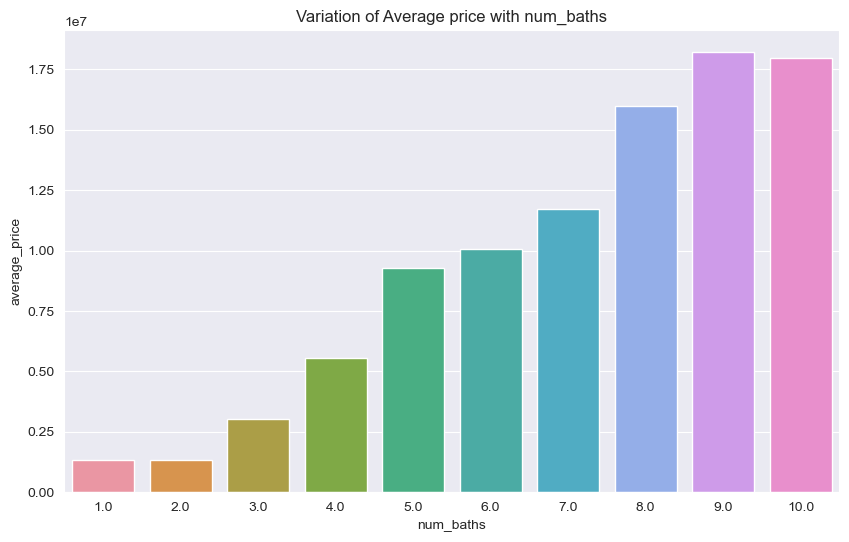

In [62]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_num_baths_average_price, x='num_baths', y='average_price')
ax.set(title='Variation of Average price with num_baths', xlabel='num_baths', ylabel='average_price')
# ax.tick_params(axis='x', rotation=90)

[Text(0.5, 1.0, 'Variation of price with num_baths'),
 Text(0.5, 0, 'num_baths'),
 Text(0, 0.5, 'price')]

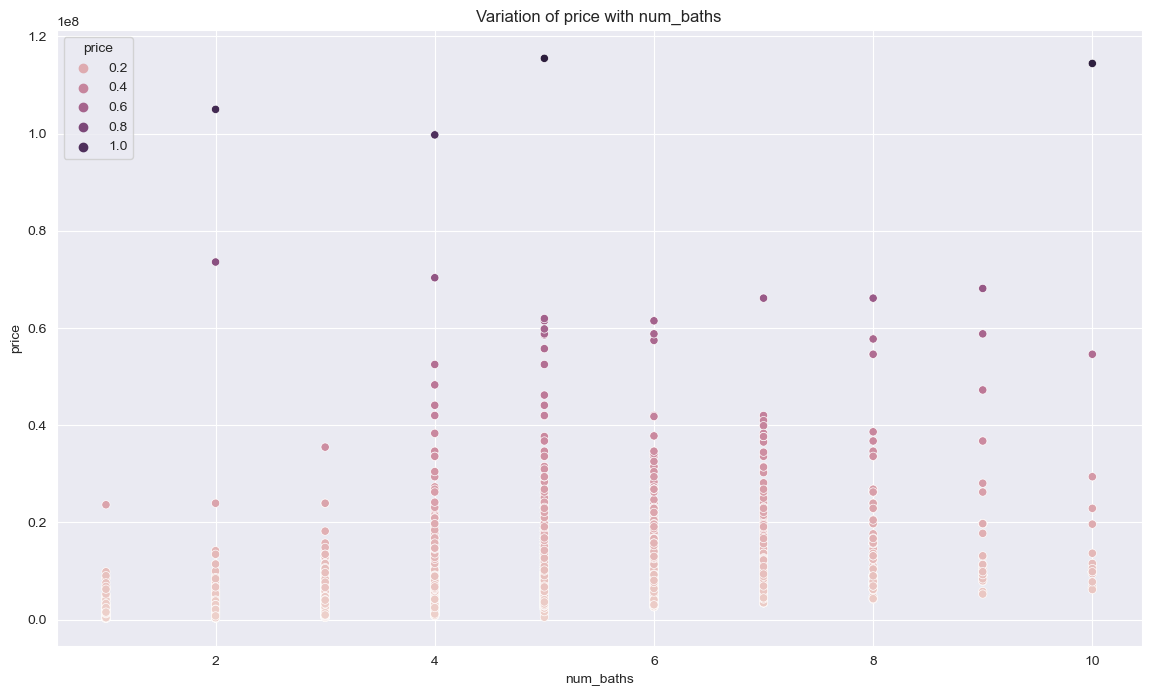

In [63]:
plt.figure(figsize=(14, 8))
ax = sns.scatterplot(data=train_X_Y, x='num_baths', y='price', hue='price')
ax.set(title='Variation of price with num_baths', xlabel='num_baths', ylabel='price')

[Text(0.5, 1.0, 'Variation of price with num_baths'),
 Text(0.5, 0, 'price'),
 Text(0, 0.5, 'num_baths')]

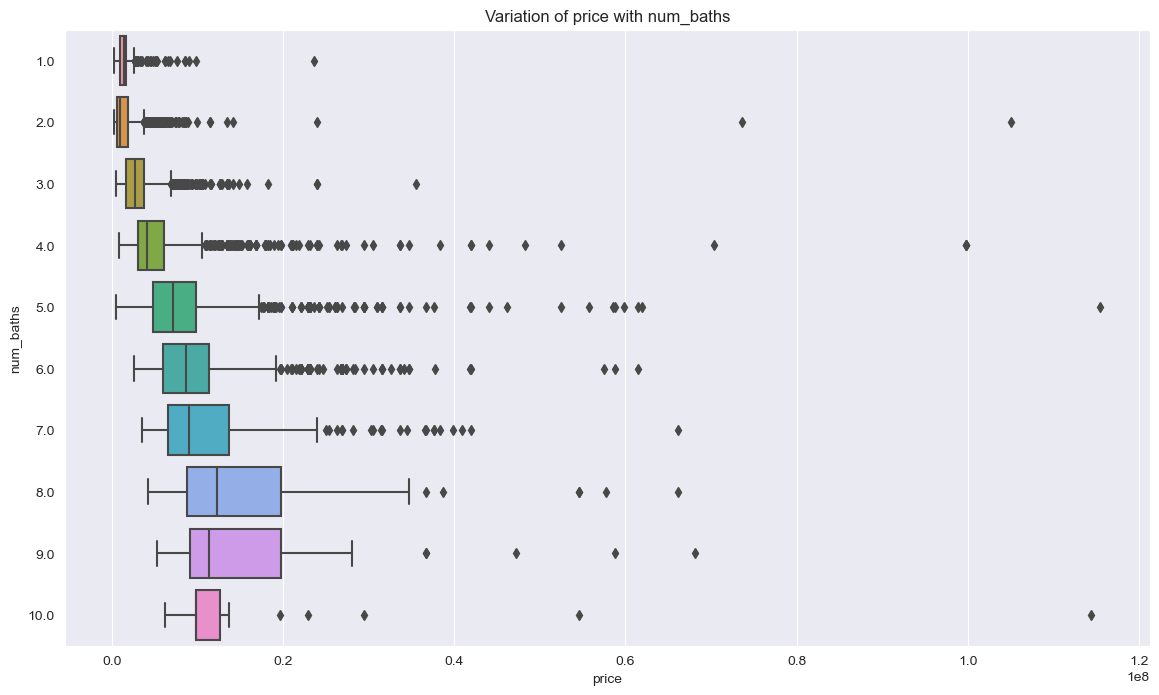

In [64]:
plt.figure(figsize=(14, 8))
ax = sns.boxplot(data=train_X_Y, x='price', y='num_baths', orient='h')
ax.set(title='Variation of price with num_baths', xlabel='price', ylabel='num_baths')

In [66]:
def label_size_sqft(row):
    if row['size_sqft'] < 0:
        return -1
    if row['size_sqft'] > 0 and row['size_sqft'] <= 500:
        return 1
    if row['size_sqft'] > 500 and row['size_sqft'] <= 800:
        return 2
    if row['size_sqft'] > 800 and row['size_sqft'] <= 1100:
        return 3
    if row['size_sqft'] > 1100 and row['size_sqft'] <= 1500:
        return 4
    if row['size_sqft'] > 1500 and row['size_sqft'] <= 2000:
        return 5
    if row['size_sqft'] > 2000 and row['size_sqft'] <= 3000:
        return 6
    if row['size_sqft'] > 3000 and row['size_sqft'] <= 4000:
        return 7
    if row['size_sqft'] > 4000 and row['size_sqft'] <= 5000:
        return 8
    if row['size_sqft'] > 5000 and row['size_sqft'] <= 8000:
        return 9
    if row['size_sqft'] > 8000 and row['size_sqft'] <= 12000:
        return 10
    if row['size_sqft'] > 12000 and row['size_sqft'] <= 30000:
        return 11
    if row['size_sqft'] > 30000:
        return 12
    
train_X_Y['size_sqft_range'] = train_X_Y.apply(lambda row: label_size_sqft(row), axis=1)

In [67]:
train_X_Y['size_sqft_range'].value_counts()

4     5250
3     4693
2     4150
5     1695
9     1028
6      946
1      823
7      607
8      581
10     306
11      38
Name: size_sqft_range, dtype: int64

In [68]:
df_size_sqft_range_average_price = train_X_Y.groupby('size_sqft_range', as_index=False)['price'].mean()
df_size_sqft_range_average_price.rename(columns={'price': 'average_price'}, inplace=True)

In [69]:
df_size_sqft_range_average_price.head(50)

,size_sqft_range,average_price
0,1,1.169074e+06
1,2,1.278698e+06
2,3,1.407556e+06
3,4,1.890256e+06
4,5,2.858818e+06
5,6,6.609154e+06
6,7,6.447083e+06
7,8,8.379955e+06
8,9,1.111721e+07
9,10,2.027297e+07


[Text(0.5, 1.0, 'Variation of Average price with size_sqft_range'),
 Text(0.5, 0, 'size_sqft_range'),
 Text(0, 0.5, 'average_price')]

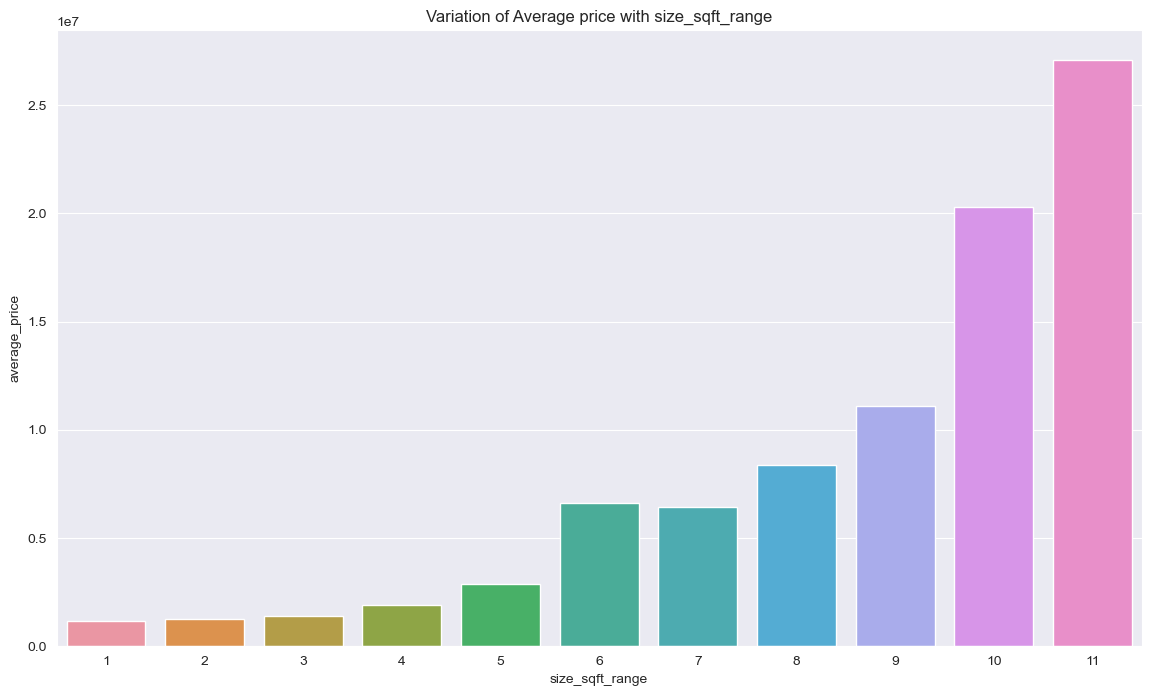

In [70]:
plt.figure(figsize=(14, 8))
ax = sns.barplot(data=df_size_sqft_range_average_price, x='size_sqft_range', y='average_price')
ax.set(title='Variation of Average price with size_sqft_range', xlabel='size_sqft_range', ylabel='average_price')
# ax.tick_params(axis='x', rotation=90)

[Text(0.5, 1.0, 'Variation of price with size_sqft_range'),
 Text(0.5, 0, 'size_sqft_range'),
 Text(0, 0.5, 'price')]

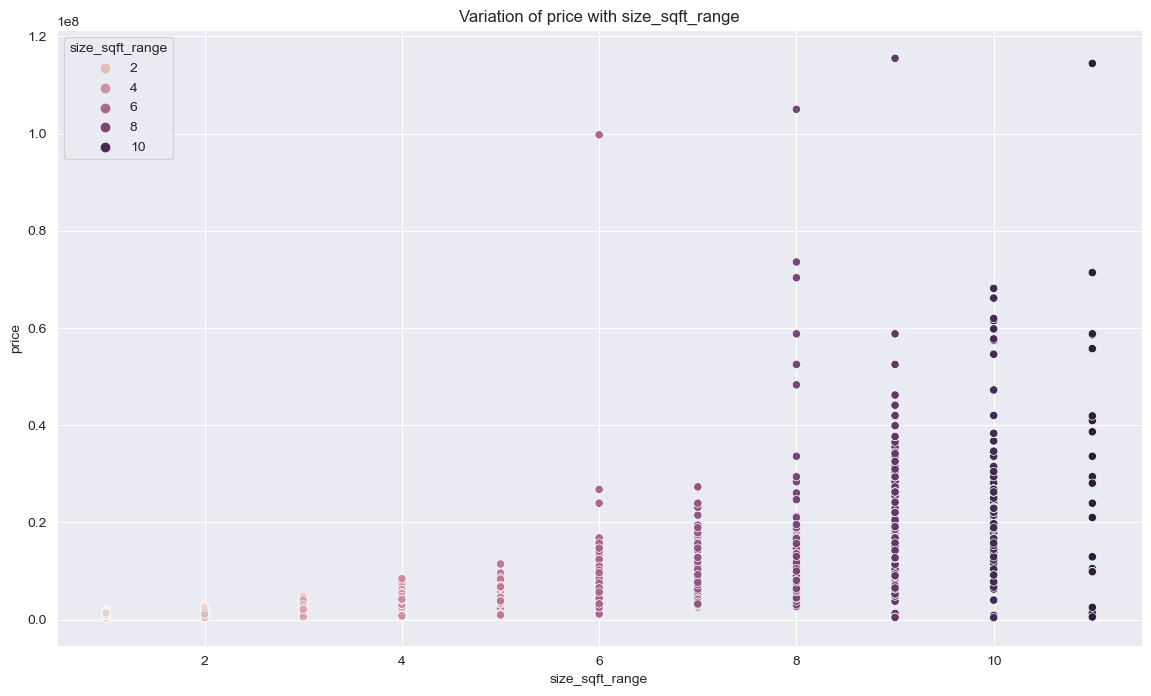

In [71]:
plt.figure(figsize=(14, 8))
ax = sns.scatterplot(data=train_X_Y, x='size_sqft_range', y='price', hue='size_sqft_range')
ax.set(title='Variation of price with size_sqft_range', xlabel='size_sqft_range', ylabel='price')